Pattern Recognition Project
# Steam Review
   Our goal is to train a model to predict if a steam review is a bad review or not. We got out data from [steam review](https://www.kaggle.com/luthfim/steam-reviews-dataset)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read and display data

In [2]:
df = pd.read_csv("steam_reviews.csv")
display(df.head())
print("Games titles \n",df['title'].unique())
print("Amount of game titles in the data", len(df['title'].unique()))

,date_posted,funny,helpful,hour_played,is_early_access_review,recommendation,review,title
0,2019-02-10,2,4,578,False,Recommended,&gt Played as German Reich&gt Declare war on B...,Expansion - Hearts of Iron IV: Man the Guns
1,2019-02-10,0,0,184,False,Recommended,yes.,Expansion - Hearts of Iron IV: Man the Guns
2,2019-02-07,0,0,892,False,Recommended,Very good game although a bit overpriced in my...,Expansion - Hearts of Iron IV: Man the Guns
3,2018-06-14,126,1086,676,False,Recommended,Out of all the reviews I wrote This one is pro...,Dead by Daylight
4,2017-06-20,85,2139,612,False,Recommended,Disclaimer I survivor main. I play games for f...,Dead by Daylight


Games titles 
 ['Expansion - Hearts of Iron IV: Man the Guns' 'Dead by Daylight'
 'Wargroove' 'Wallpaper Engine' 'Factorio' 'Insurgency: Sandstorm'
 'Cold Waters' 'Tannenberg' 'Pathfinder: Kingmaker'
 'MONSTER HUNTER: WORLD' 'Divinity: Original Sin 2 - Definitive Edition'
 'Football Manager 2019' "Garry's Mod" 'Survivor Pass: Vikendi'
 'Moonlighter' 'Terraria' 'GOD EATER 3' 'Sid Meier’s Civilization® VI'
 'Rocket League®' 'Subnautica: Below Zero'
 "Tom Clancy's Rainbow Six® Siege" 'ASTRONEER'
 'Sid Meier’s Civilization® VI: Rise and Fall' 'Kenshi'
 'Euro Truck Simulator 2' 'Grand Theft Auto V' 'RimWorld' 'NBA 2K19'
 'RESIDENT EVIL 2 / BIOHAZARD RE:2' 'Slay the Spire' 'My Time At Portia'
 'Foundation' 'Beat Saber' "Sid Meier's Civilization® VI: Gathering Storm"
 'Stardew Valley' 'Farming Simulator 19' "PLAYERUNKNOWN'S BATTLEGROUNDS"
 'Overcooked! 2' "Don't Starve Together" 'Rust' 'Subnautica'
 'ACE COMBAT™ 7: SKIES UNKNOWN' 'Left 4 Dead 2' 'ARK: Survival Evolved'
 'Battlefleet Gothic: A

## Filter data to only PLAYERUNKNOWN'S BATTLEGROUNDS game

In [3]:
df = df[df['title'] == "PLAYERUNKNOWN\'S BATTLEGROUNDS"]
display(df.head())

,date_posted,funny,helpful,hour_played,is_early_access_review,recommendation,review,title
214781,2017-12-15,0,0,194,True,Not Recommended,193 Hours truly wasted. No to this game simply...,PLAYERUNKNOWN'S BATTLEGROUNDS
214782,2017-12-20,0,0,574,False,Not Recommended,MAKE SERVERS REGION RESTRICTED! There's so man...,PLAYERUNKNOWN'S BATTLEGROUNDS
214783,2018-03-02,0,0,228,False,Not Recommended,reskin version of h1z1 kotk. taking the same p...,PLAYERUNKNOWN'S BATTLEGROUNDS
214784,2017-10-04,0,0,141,True,Recommended,Fun game should be great once it's finished.,PLAYERUNKNOWN'S BATTLEGROUNDS
214785,2018-01-07,0,0,426,False,Not Recommended,Just at the current state that the game is in ...,PLAYERUNKNOWN'S BATTLEGROUNDS


## Check for if the game is recommended and count the length of the game review.

In [4]:
def length(df):
    return len(str(df['review']))

def count(df):
    if df['recommendation'] == 'Recommended':
        return 1
    else:
        return 0


df['review_len'] = df.apply(length,axis=1)
df['recommendation_flag'] = df.apply(count,axis=1)

In [5]:
df.head()

,date_posted,funny,helpful,hour_played,is_early_access_review,recommendation,review,title,review_len,recommendation_flag
214781,2017-12-15,0,0,194,True,Not Recommended,193 Hours truly wasted. No to this game simply...,PLAYERUNKNOWN'S BATTLEGROUNDS,99,0
214782,2017-12-20,0,0,574,False,Not Recommended,MAKE SERVERS REGION RESTRICTED! There's so man...,PLAYERUNKNOWN'S BATTLEGROUNDS,268,0
214783,2018-03-02,0,0,228,False,Not Recommended,reskin version of h1z1 kotk. taking the same p...,PLAYERUNKNOWN'S BATTLEGROUNDS,301,0
214784,2017-10-04,0,0,141,True,Recommended,Fun game should be great once it's finished.,PLAYERUNKNOWN'S BATTLEGROUNDS,44,1
214785,2018-01-07,0,0,426,False,Not Recommended,Just at the current state that the game is in ...,PLAYERUNKNOWN'S BATTLEGROUNDS,923,0


## Count the good and bad reviews of the game.

0    58120
1    86726
Name: review, dtype: int64


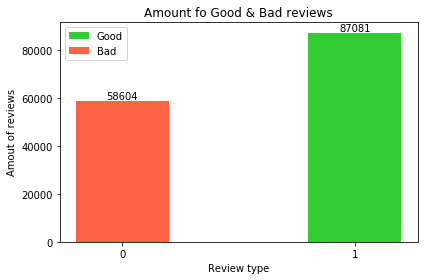

In [6]:
rec_count = df.groupby(['recommendation_flag']).count()
rec_count = rec_count.reset_index()

print(rec_count['review'])

fig, ax = plt.subplots()
labels = ['0', '1']

rect1 = ax.bar(rec_count.loc[1, 'recommendation_flag'],
               rec_count.loc[1, 'funny'], label='Good', width=0.4, color='limegreen')
rect2 = ax.bar(rec_count.loc[0, 'recommendation_flag'],
               rec_count.loc[0, 'funny'], label='Bad', width=0.4, color='tomato')


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
autolabel(rect1)
autolabel(rect2)
ax.set_ylabel('Amout of reviews')
ax.set_xlabel('Review type')
ax.set_title('Amount fo Good & Bad reviews')

fig.tight_layout()
plt.legend()
plt.show()

## Clean and Split data

In [7]:
from sklearn.model_selection import train_test_split
clean_data = df.dropna()

# Seperate features
train = clean_data
X = train['review']
y = train['recommendation_flag']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=273, stratify=y)

## Train Data

In [8]:
from time import time

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

'CountVectorizer + MultinomialNB'

preprocessing done in 0.000s.
fitting done in 6.801s.
predicting done in 2.690s.
              precision    recall  f1-score   support

           0       0.81      0.74      0.77     17436
           1       0.84      0.88      0.86     26018

    accuracy                           0.83     43454
   macro avg       0.82      0.81      0.82     43454
weighted avg       0.82      0.83      0.82     43454



'CountVectorizer + LogisticRegression'

preprocessing done in 0.000s.


/home/vicky-decoder/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


fitting done in 21.664s.
predicting done in 2.108s.
              precision    recall  f1-score   support

           0       0.46      0.93      0.61     17436
           1       0.85      0.27      0.41     26018

    accuracy                           0.53     43454
   macro avg       0.65      0.60      0.51     43454
weighted avg       0.69      0.53      0.49     43454



'CountVectorizer + LogisticRegression'

preprocessing done in 0.000s.


/home/vicky-decoder/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


fitting done in 26.284s.
predicting done in 2.271s.
              precision    recall  f1-score   support

           0       0.46      0.93      0.61     17436
           1       0.85      0.27      0.41     26018

    accuracy                           0.53     43454
   macro avg       0.65      0.60      0.51     43454
weighted avg       0.69      0.53      0.49     43454



'CountVectorizer + SGDClassifier'

preprocessing done in 0.000s.
fitting done in 5.744s.
predicting done in 2.165s.
              precision    recall  f1-score   support

           0       0.84      0.67      0.74     17436
           1       0.80      0.91      0.85     26018

    accuracy                           0.81     43454
   macro avg       0.82      0.79      0.80     43454
weighted avg       0.82      0.81      0.81     43454



'TfidfVectorizer + MultinomialNB'

preprocessing done in 0.000s.
fitting done in 6.285s.
predicting done in 2.641s.
              precision    recall  f1-score   support

           0       0.84      0.70      0.76     17436
           1       0.82      0.91      0.86     26018

    accuracy                           0.83     43454
   macro avg       0.83      0.80      0.81     43454
weighted avg       0.83      0.83      0.82     43454



'TfidfVectorizer + LogisticRegression'

preprocessing done in 0.000s.
fitting done in 12.966s.
predicting done in 2.603s.
              precision    recall  f1-score   support

           0       0.79      0.84      0.81     17436
           1       0.89      0.85      0.87     26018

    accuracy                           0.84     43454
   macro avg       0.84      0.84      0.84     43454
weighted avg       0.85      0.84      0.85     43454



'TfidfVectorizer + LogisticRegression'

preprocessing done in 0.000s.
fitting done in 10.362s.
predicting done in 3.206s.
              precision    recall  f1-score   support

           0       0.77      0.83      0.80     17436
           1       0.88      0.83      0.86     26018

    accuracy                           0.83     43454
   macro avg       0.83      0.83      0.83     43454
weighted avg       0.84      0.83      0.83     43454



'TfidfVectorizer + SGDClassifier'

preprocessing done in 0.000s.
fitting done in 7.056s.
predicting done in 3.452s.
              precision    recall  f1-score   support

           0       0.84      0.62      0.71     17436
           1       0.78      0.92      0.85     26018

    accuracy                           0.80     43454
   macro avg       0.81      0.77      0.78     43454
weighted avg       0.80      0.80      0.79     43454



'TfidfVectorizer + MultinomialNB'

preprocessing done in 0.000s.
fitting done in 9.010s.
predicting done in 4.014s.
              precision    recall  f1-score   support

           0       0.83      0.71      0.77     17436
           1       0.82      0.91      0.86     26018

    accuracy                           0.83     43454
   macro avg       0.83      0.81      0.81     43454
weighted avg       0.83      0.83      0.82     43454



'TfidfVectorizer + LogisticRegression'

preprocessing done in 0.000s.
fitting done in 14.680s.
predicting done in 3.018s.
              precision    recall  f1-score   support

           0       0.79      0.83      0.81     17436
           1       0.88      0.85      0.87     26018

    accuracy                           0.84     43454
   macro avg       0.83      0.84      0.84     43454
weighted avg       0.84      0.84      0.84     43454



'TfidfVectorizer + LogisticRegression'

preprocessing done in 0.000s.
fitting done in 14.740s.
predicting done in 2.960s.
              precision    recall  f1-score   support

           0       0.77      0.83      0.80     17436
           1       0.88      0.83      0.86     26018

    accuracy                           0.83     43454
   macro avg       0.82      0.83      0.83     43454
weighted avg       0.84      0.83      0.83     43454



'TfidfVectorizer + SGDClassifier'

preprocessing done in 0.000s.
fitting done in 8.185s.
predicting done in 3.003s.
              precision    recall  f1-score   support

           0       0.84      0.61      0.71     17436
           1       0.78      0.92      0.85     26018

    accuracy                           0.80     43454
   macro avg       0.81      0.77      0.78     43454
weighted avg       0.80      0.80      0.79     43454



'TfidfVectorizer + MultinomialNB'

preprocessing done in 0.000s.
fitting done in 46.637s.
predicting done in 3.940s.
              precision    recall  f1-score   support

           0       0.91      0.30      0.46     17436
           1       0.68      0.98      0.80     26018

    accuracy                           0.71     43454
   macro avg       0.79      0.64      0.63     43454
weighted avg       0.77      0.71      0.66     43454



'TfidfVectorizer + LogisticRegression'

preprocessing done in 0.000s.
fitting done in 69.728s.
predicting done in 4.169s.
              precision    recall  f1-score   support

           0       0.77      0.52      0.62     17436
           1       0.74      0.90      0.81     26018

    accuracy                           0.75     43454
   macro avg       0.75      0.71      0.72     43454
weighted avg       0.75      0.75      0.73     43454



'TfidfVectorizer + LogisticRegression'

preprocessing done in 0.000s.
fitting done in 65.155s.
predicting done in 5.167s.
              precision    recall  f1-score   support

           0       0.50      0.91      0.64     17436
           1       0.87      0.39      0.53     26018

    accuracy                           0.60     43454
   macro avg       0.68      0.65      0.59     43454
weighted avg       0.72      0.60      0.58     43454



'TfidfVectorizer + SGDClassifier'

preprocessing done in 0.000s.
fitting done in 51.522s.
predicting done in 5.978s.
              precision    recall  f1-score   support

           0       0.97      0.00      0.01     17436
           1       0.60      1.00      0.75     26018

    accuracy                           0.60     43454
   macro avg       0.78      0.50      0.38     43454
weighted avg       0.75      0.60      0.45     43454



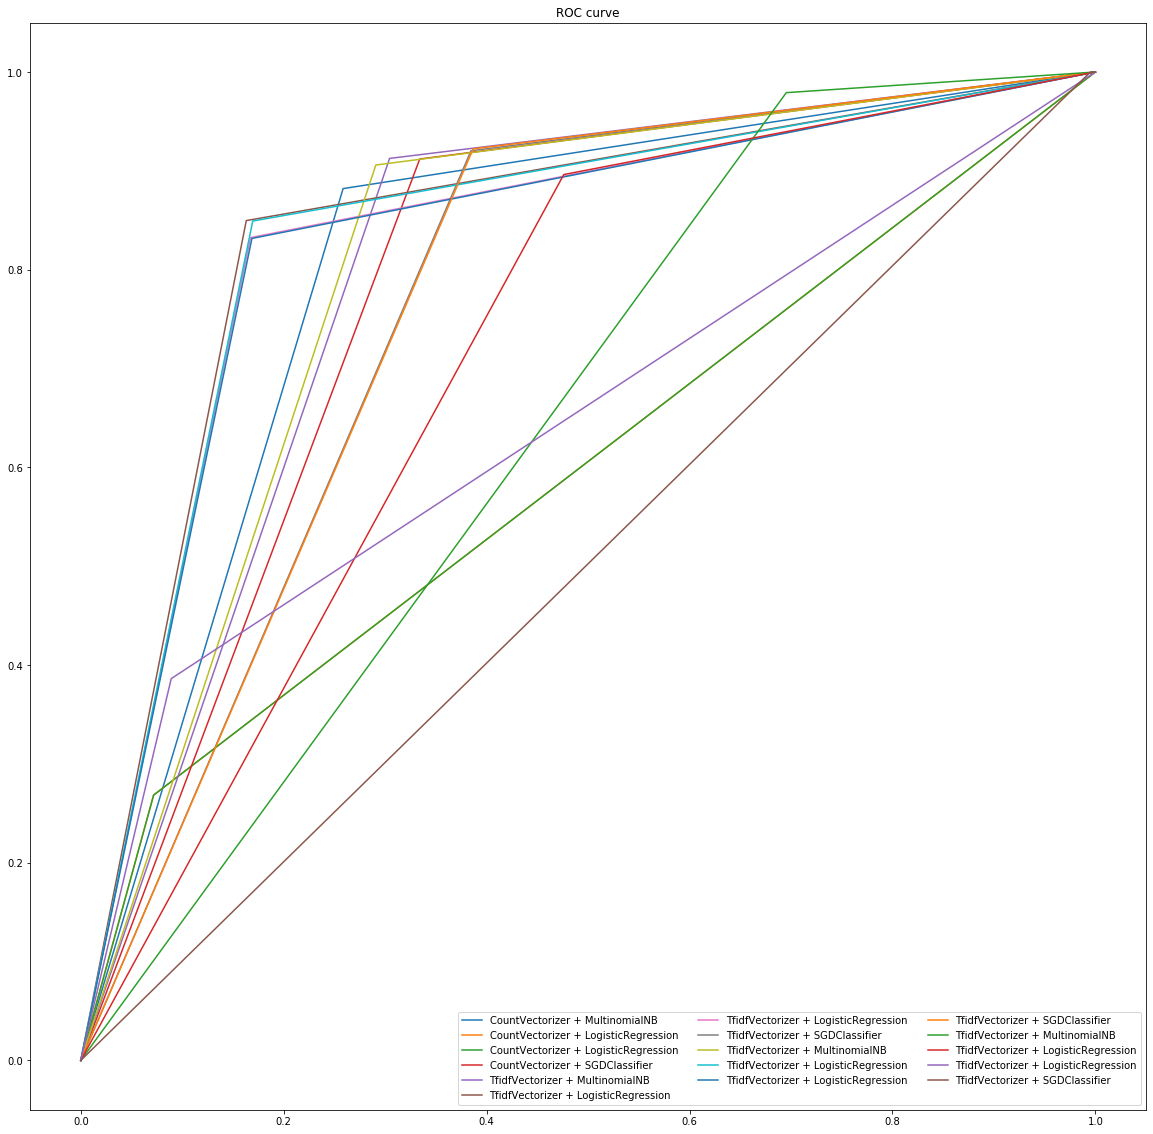

In [27]:
# Zoo of vectorizers inside a pipline, some include comments
vector = [
    ('vect', CountVectorizer(min_df=5)),
    ('vect', TfidfVectorizer(max_df=0.99, norm='l2')),
    ('vect', TfidfVectorizer(max_df=0.2, norm='l2')),
    ('vect', TfidfVectorizer(max_df=0.99, norm='l2',
                             ngram_range=(4, 4)))
]

# GaussianNB() - Doesn't Work data too spares
classifer = [
    ('clf', MultinomialNB()),
    ('clf', LogisticRegression(solver='saga',
                               fit_intercept=True, class_weight='balanced')),
    ('clf', LogisticRegression(solver='saga', fit_intercept=True,
                               class_weight='balanced', C=0.1)),  # < reasonable
    ('clf', SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=273,
                          max_iter=5, tol=None))
]
plt.figure(figsize=(20, 20))
for vec in vector:
    for clf in classifer:
        vecName = str(vec[1]).split("(")
        clfName = str(clf[1]).split("(")
        trainingName = str(vecName[0]) + " + " + str(clfName[0])
        print(trainingName, vec[1], clf[1])
        t0 = time()
        text_clf = Pipeline([vec, clf])
        print("preprocessing done in %0.3fs." % (time() - t0))

        t0 = time()
        text_clf.fit(X_train, y_train)
        print("fitting done in %0.3fs." % (time() - t0))

        t0 = time()
        y_pred = text_clf.predict(X_test)
        print("predicting done in %0.3fs." % (time() - t0))
        print(classification_report(y_test, y_pred))

        fpr_rt_lm, tpr_rt_lm, _ = roc_curve(y_test, y_pred)
        plt.plot(fpr_rt_lm, tpr_rt_lm, label=trainingName)

plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best', ncol=3)
plt.grid()
plt.show()

## Display weight of each word

In [9]:
import eli5

t0 = time()
text_clf = Pipeline([('vect', TfidfVectorizer(max_df=0.99, norm='l2')), ('clf', LogisticRegression(solver='saga',
                                                                                                   fit_intercept=True, class_weight='balanced'))])
print("preprocessing done in %0.3fs." % (time() - t0))

t0 = time()
text_clf.fit(X_train, y_train)
print("fitting done in %0.3fs." % (time() - t0))

t0 = time()
y_pred = text_clf.predict(X_test)
print("predicting done in %0.3fs." % (time() - t0))
print(classification_report(y_test, y_pred))

eli5.show_weights(text_clf, vec=text_clf.named_steps["vect"], top=40)

preprocessing done in 0.000s.
fitting done in 13.234s.
predicting done in 2.987s.
              precision    recall  f1-score   support

           0       0.79      0.84      0.81     17436
           1       0.89      0.85      0.87     26018

    accuracy                           0.84     43454
   macro avg       0.84      0.84      0.84     43454
weighted avg       0.85      0.84      0.85     43454



Weight?,Feature
+8.125,best
+7.238,great
+6.361,awesome
+6.331,amazing
+6.205,good
+5.896,love
+5.523,fun
+4.680,complaining
+4.552,addicting
+4.525,reviews


## Report Summery

### Why we chose PUBG
We chose PUBG as the number of review data for the game is more than that of any other game which makes it most reliable to train and test with.

### Model and vectorisation we pick

### Why this ... is the best model and vectorization
We know this particular model and vectorization is best and we choose it as we can from the ROC curve which combination of model and vectorization produces the most accurate precision in average compared to the time it takes to make that prediction.
 
### End note
Thereby we can use the best model and vectorization combination we picked to find weight of the words used in the reviews to check whether the review is a good or bad review towards the game. 